<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/PCA_on_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('/content/diabetes.csv')

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data = data.drop(columns=['Outcome'],axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datascaled = scaler.fit_transform(data)
datascaled = pd.DataFrame(datascaled)
datascaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Find Covariance Matrix

In [9]:
datascaled.shape

(768, 8)

In [10]:
covarianceMatrix = datascaled.T @ datascaled / 767
covarianceMatrix

,0,1,2,3,4,5,6,7
0,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051
1,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858
2,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840
3,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119
4,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218
5,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289
6,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605
7,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304


In [11]:
eigenValues , eigenVectors = np.linalg.eig(covarianceMatrix)

In [12]:
print(eigenValues)

[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


In [14]:
# select principle components
PC1_data = datascaled @ eigenVectors[:,0]
PC2_data = datascaled @ eigenVectors[:,1]
PC3_data = datascaled @ eigenVectors[:,7]

In [18]:
print(PC1_data)
print("-" * 20)
print(PC2_data)
print("-" * 20)
print(PC3_data)


0     -1.068503
1      1.121683
2      0.396477
3      1.115781
4     -2.359334
         ...   
763   -1.562085
764    0.100405
765    0.283475
766    1.060324
767    0.839892
Length: 768, dtype: float64
--------------------
0     -1.234895
1      0.733852
2     -1.595876
3      1.271241
4      2.184819
         ...   
763   -1.923150
764    0.614181
765   -0.097065
766   -0.837062
767    1.151755
Length: 768, dtype: float64
--------------------
0     -0.095930
1      0.712938
2     -1.760678
3      0.663729
4     -2.963107
         ...   
763    0.867408
764    0.764353
765    0.077192
766   -0.425030
767    1.009178
Length: 768, dtype: float64


pca implementaion via the sklearn library

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(datascaled)

array([[ 1.06850273,  1.23489499, -0.09592984],
       [-1.12168331, -0.73385167,  0.71293816],
       [-0.39647671,  1.59587594, -1.76067844],
       ...,
       [-0.28347525,  0.09706503,  0.07719194],
       [-1.06032431,  0.83706234, -0.42503045],
       [-0.83989172, -1.15175485,  1.00917817]])

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(datascaled)
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

vizsulaizing cumulative expalined varience in pca

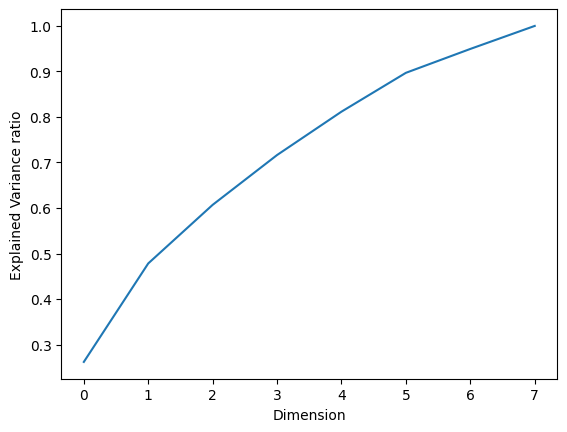

In [26]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimension')
plt.ylabel('Explained Variance ratio')
plt.savefig('screenplot.png')
plt.show()

by the time when we reach 4th component 80% of the variance is captured

In this i have not performed the EDA of the data only implemented the PCA in both ways by sklearn and by normal way